#Python notebook for ML

In [118]:
print("Hello World!")

Hello World!


In [119]:
import numpy as np

a = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])

print(a[0])

[1 2 3 4]


In [120]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection

In [121]:
X,y = datasets.load_diabetes(return_X_y=True)
columns = ["age age in years", "sex", "bmi body mass index","bp average blood pressure","s1 tc, total serum cholesterol","s2 ldl, low-density lipoproteins","s3 hdl, high-density lipoproteins","s4 tch, total cholesterol / HDL","s5 ltg, possibly log of serum triglycerides level","s6 glu, blood sugar level"]
print(X.shape)
print(X[0])


(442, 10)
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]


In [122]:
columnNumber = 2
X = X[:,columnNumber]
print(X.shape)
X = X.reshape((-1,1))
print(X.shape)


(442,)
(442, 1)


Splitting between training and testing data and training

In [123]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.25)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Testing

In [124]:
y_pred = model.predict(X_test)

Plotting graph

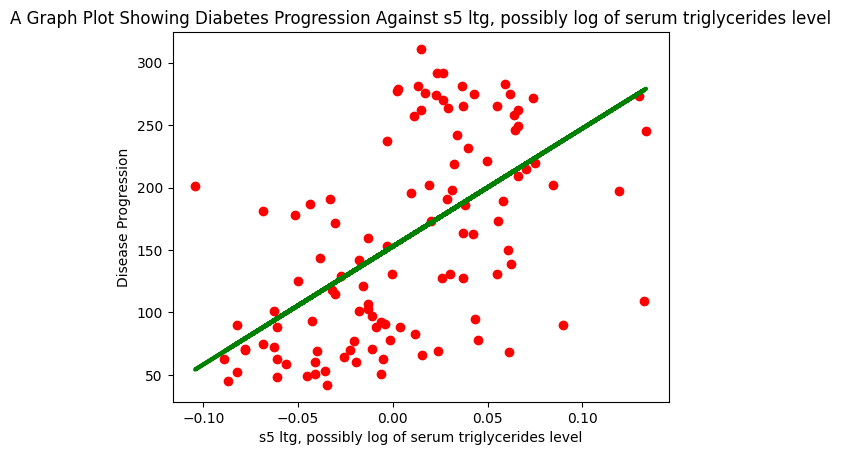

In [125]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='green', linewidth=3)
plt.xlabel(f"{columns[columnNumber]}")
plt.ylabel("Disease Progression")
plt.title(f"A Graph Plot Showing Diabetes Progression Against {columns[columnNumber]}")
plt.show()